# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('../GitHub/python-ml-course/datasets/ecom-expense/Ecom Expense.csv')

In [3]:
df

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856


In [4]:
dummy_gender=pd.get_dummies(df.Gender,prefix="Gender")
dummy_city_tier=pd.get_dummies(df["City Tier"],prefix="City")

In [5]:
dummy_city_tier

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [6]:
cols=df.columns.values.tolist()

In [7]:
df_new=df[cols].join(dummy_gender)
cols=df_new.columns.values.tolist()
df_new=df_new[cols].join(dummy_city_tier)

In [8]:
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0


In [9]:
feature_cols=cols[3:5]+df_new.columns.values.tolist()[-5:]+["Record"]

In [10]:
feature_cols

['Monthly Income',
 'Transaction Time',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3',
 'Record']

In [11]:
X=df_new[feature_cols]
Y=df_new["Total Spend"]

In [12]:
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lm.intercept_,lm.coef_,lm.score(X,Y)

(-79.41713030137544,
 array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
         7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02]),
 0.9179923586131016)

In [14]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Female', -131.02501325554584),
 ('Gender_Male', 131.02501325554567),
 ('City_Tier 1', 76.76432601049501),
 ('City_Tier 2', 55.13897430923278),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.233445744565)]

In [15]:
predic=np.ones((len(df_new.Gender_Female)))
for x in range (0,len(predic)):
    b=0
    for i,j in zip(feature_cols,lm.coef_):
        b+=df_new[i].loc[x]*j
    predic[x]=lm.intercept_+b

In [16]:
df_new['pred']=predic
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,pred
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8220.596094


In [17]:
SSD=sum((df_new.pred-df_new["Total Spend"])**2)
RSE=np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [18]:
RSE

803.1318809818156

In [19]:
error=RSE/np.mean(df_new["Total Spend"])
error

0.13031135680294145

In [20]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [21]:
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,pred,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3336.456655,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8069.348522,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,9050.690358,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8220.596094,8220.596094


El modelo puede ser escrito como:
* Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648
    * Si es hombre y vive en CT1: Total_Spend = **128.37220896466724** + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es hombre y vive en CT2: Total_Spend = **106.74685726340445** + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    * Si es hombre y vive en CT3: Total_Spend = **-80.29541736555583** + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

Puede notarse que solo hacen falta *n-1* variables para una variable categórica de *n* niveles. Solo se necesitaria una para la variable **Gender** y 2 para **City Tier**. Por lo tanto se hace un enmascarado de las variables.

# Eliminar variables dummy redundantes

In [22]:
dummy_gender=pd.get_dummies(df.Gender,prefix="Gender").iloc[:,1:]
dummy_city_tier=pd.get_dummies(df["City Tier"],prefix="City").iloc[:,1:]

In [23]:
cols=df.columns.values.tolist()

In [24]:
df_new=df[cols].join(dummy_gender)
cols=df_new.columns.values.tolist()
df_new=df_new[cols].join(dummy_city_tier)

In [25]:
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,1,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,1,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,0,0,0


In [26]:
feature_cols=cols[3:5]+df_new.columns.values.tolist()[-3:]+["Record"]
feature_cols

['Monthly Income',
 'Transaction Time',
 'Gender_Male',
 'City_Tier 2',
 'City_Tier 3',
 'Record']

In [55]:
X=df_new[feature_cols]
Y=df_new["Total Spend"]
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lm.intercept_,lm.coef_,lm.score(X,Y)

(-133.67781754642238,
 array([ 1.47538980e-01,  1.54946125e-01,  2.62050027e+02, -2.16253517e+01,
        -2.08667626e+02,  7.72233446e+02]),
 0.9179923586131016)

In [57]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Male', 262.0500265110957),
 ('City_Tier 2', -21.625351701263007),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.2334457445636)]

In [58]:
lm.score(X,Y)

0.9179923586131016

Sabiendo que la linea base es que sea mujer y viva en city tier 1 (Esto también se puede inferir porque son las varriables enmascaradas **Variables que no hacen parte del modelo**):
* Gender_Male sería el coeficiente de un hombre que viviera en city tier 1
* El de city tier 2 sería el de una mujer que vive en city tier 2 
* El de city tier 3 sería el de una mujer que vive en city tier 3 

**Antes del enmascarado:**

* ('Monthly Income', 0.1475389804920575),
* ('Transaction Time', 0.1549461254958966),
* ('Gender_Male', 262.0500265110957),
* ('City_Tier 2', -21.625351701263007),
* ('City_Tier 3', -208.6676263302229),
* ('Record', 772.2334457445636)]


**Después del enmascarado:**

* ('Monthly Income', 0.14753898049205746),
* ('Transaction Time', 0.15494612549589704),
* ('Gender_Female', -131.02501325554584),
* ('Gender_Male', 131.02501325554567),
* ('City_Tier 1', 76.76432601049501),
* ('City_Tier 2', 55.13897430923278),
* ('City_Tier 3', -131.90330031972783),
* ('Record', 772.233445744565)]

Los cambios entre antes y después del enmascarado se ve en:

* Gender Male:
    * Antes: 131.0250
    * Después: 131.025 -(-131.025) = 262.05
* City_Tier 2:
    * Antes: 55.13
    * Después:-21.62= 55.13 - 76.76 = -21.62
* City_Tier 3:
    * Antes: -131.90
    * Después: -208.66 --> -131.90 - 76.76 = -208.66
    
Estos cambios se los lleva la ordenada en el origen (notar que el intercepto cambió

# Transformación de variables para conseguir una relación no lineal

In [59]:
data_auto=pd.read_csv("../GitHub/python-ml-course/datasets/auto/auto-mpg.csv")

In [60]:
data_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [61]:
data_auto.mpg=data_auto.mpg.dropna()
data_auto.horsepower.mpg=data_auto.horsepower.dropna()

Text(0.5, 1.0, 'CV vs MPG')

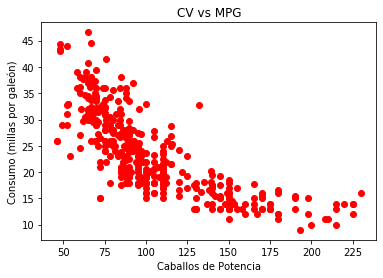

In [62]:
plt.plot(data_auto.horsepower,data_auto.mpg,'ro')
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

## Modelo de regresión lineal

\begin{equation}
Y=\alpha+\beta*X
\end{equation}

Y:mpg\
X:horsepower

In [63]:
X=data_auto.horsepower.fillna(np.mean(data_auto.horsepower))
Y=data_auto.mpg.fillna(np.mean(data_auto.mpg))

In [64]:
X=X[:,np.newaxis]

In [65]:
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'CV vs MPG')

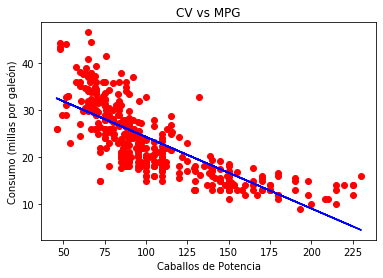

In [66]:
plt.plot(data_auto.horsepower,data_auto.mpg,'ro')
plt.plot(data_auto.horsepower,lm.predict(X),'b')
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

In [67]:
lm.score(X,Y)

0.5746533406450252

In [68]:
def error_standar(X,Y):
    SSD=np.sum((Y-lm.predict(X))**2)
    y_mean=np.mean(Y)
    RSE=np.sqrt(SSD/(len(X)-1))
    error=RSE/np.mean(Y)
    print("SSD:"+ str(SSD),"y_mean: "+str(y_mean),"RSE: "+str(RSE),"error: "+str(error*100))

In [69]:
error_standar(X,Y)

SSD:10315.751960060918 y_mean: 23.514572864321607 RSE: 5.046879480825511 error: 21.462773361633474


## Modelo de regresión cuadrático

\begin{equation}
Y=\alpha+\beta*X^{2}
\end{equation}

Y:mpg\
X:horsepower

In [70]:
X_data=X**2
Y=data_auto.mpg.fillna(np.mean(data_auto.mpg))
# X=X[:,np.newaxis]

In [71]:
lm=LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'CV vs MPG')

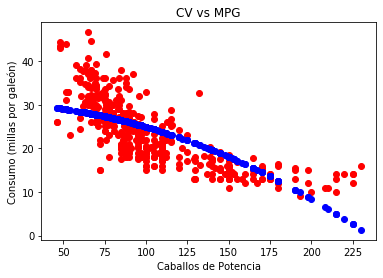

In [72]:
plt.plot(data_auto.horsepower,data_auto.mpg,'ro')
plt.plot(data_auto.horsepower,lm.predict(X_data),'bo')
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

In [73]:
lm.score(X_data,Y)

0.4849887034823205

In [74]:
error_standar(X_data,Y)

SSD:12490.350340501926 y_mean: 23.514572864321607 RSE: 5.553410772769817 error: 23.616889852998113



## Modelo de regresión polinómica

A partir de una relación lineal en conjunto con una cuadrática

\begin{equation}
Y=\alpha+\beta_{0}*X+\beta_{1}*X^{2}
\end{equation}

Y:mpg\
X:horsepower

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [76]:
poly=PolynomialFeatures(degree=2)

In [77]:
X_data=poly.fit_transform(X)
lm=linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
lm.score(X_data,Y)

0.6439066584257469

In [79]:
for d in range(2,7):
    print("Polinomio de grado "+str(d))
    poly=PolynomialFeatures(degree=d)
    X_data=poly.fit_transform(X)
    lm=linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print(lm.coef_)
    print("R2: "+str(lm.score(X_data,Y)))
    error_standar(X_data,Y)
    print("\n")

Polinomio de grado 2
[ 0.         -0.43404318  0.00112615]
R2: 0.6439066584257469
SSD:8636.180643524502 y_mean: 23.514572864321607 RSE: 4.61778115803654 error: 19.6379546619069


Polinomio de grado 3
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
R2: 0.6444678885560744
SSD:8622.56936742855 y_mean: 23.514572864321607 RSE: 4.614140736300908 error: 19.622473106036686


Polinomio de grado 4
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
R2: 0.6467674189704502
SSD:8566.799832491351 y_mean: 23.514572864321607 RSE: 4.599194731579757 error: 19.558912501268786


Polinomio de grado 5
[ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]
R2: 0.6547512491371934
SSD:8373.171388773775 y_mean: 23.514572864321607 RSE: 4.546921734122058 error: 19.33661206757895


Polinomio de grado 6
[ 0.00000000e+00  1.07622445e+01 -2.30165514e-01  2.40584068e-03
 -1.33797044e-05  3.79780867e-08 -4.32542890e-11]
R2: 0.6

# El problema de los outliers

Text(0.5, 1.0, 'CV vs MPG')

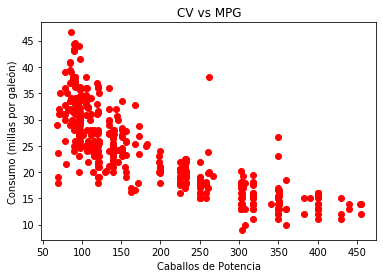

In [80]:
plt.plot(data_auto.displacement,data_auto.mpg,'ro')
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

In [81]:
X=data_auto["displacement"].fillna(data_auto["displacement"].mean())
X=X[:,np.newaxis]
Y=data_auto.mpg.fillna(np.mean(data_auto.mpg))


lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lm.score(X,Y)

0.6261049762826918

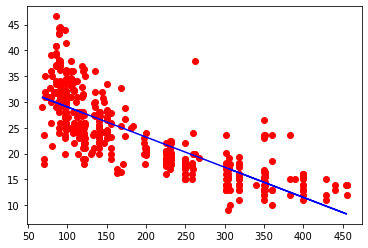

In [84]:
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),'blue')

In [88]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [89]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


**Aquí se eliminan algunos outliers**

In [90]:
data_auto_clean=data_auto.drop(index=[395,258,305,372])

In [91]:
data_auto_clean

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [92]:
X=data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X=X[:,np.newaxis]
Y=data_auto_clean.mpg.fillna(np.mean(data_auto_clean.mpg))


lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
lm.score(X,Y)

0.6466514317531822

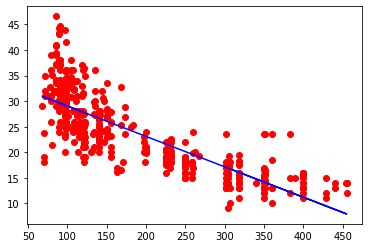

In [94]:
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),'blue')

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc5cf8717b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc5cf871e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc5cf8714a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc5cf7fe518>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc5cf7fe860>],
 'means': []}

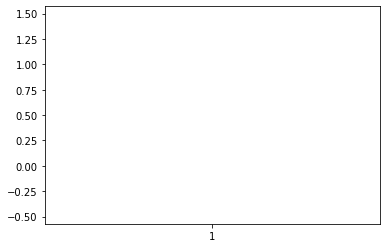

In [98]:
plt.boxplot(data_auto["mpg"])